# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
df = pd.read_csv("porter_data_1.csv")

warnings.filterwarnings("ignore")

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
df["market_id"] = (df["market_id"].astype(int)).astype("category")
df["store_primary_category"] = df["store_primary_category"].astype("category")
df["order_protocol"] = (df["order_protocol"].astype(int)).astype("category")

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
df["time_taken"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
df["order_hour"] = df["created_at"].dt.hour
df["order_day"] = df["created_at"].dt.day_of_week

df["isWeekend"] = df["order_day"].apply(lambda x: 1 if (x==5 or x==6) else 0)

In [8]:
df.drop(["created_at", "actual_delivery_time"], axis=1, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [9]:
y = df[["time_taken"]]
X = (df[["market_id", "store_primary_category", "order_protocol", "total_items", "subtotal", "num_distinct_items", 
         "min_item_price", "max_item_price", "total_onshift_dashers", "total_busy_dashers", "total_outstanding_orders", 
         "distance", "order_hour", "order_day", "isWeekend"]])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [10]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [11]:
numerical = (["total_items", "subtotal", "num_distinct_items", "min_item_price", "max_item_price", "total_onshift_dashers", 
              "total_busy_dashers", "total_outstanding_orders", "distance", "order_hour", "order_day"])
categorical = ["market_id", "store_primary_category", "order_protocol", "isWeekend"]

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

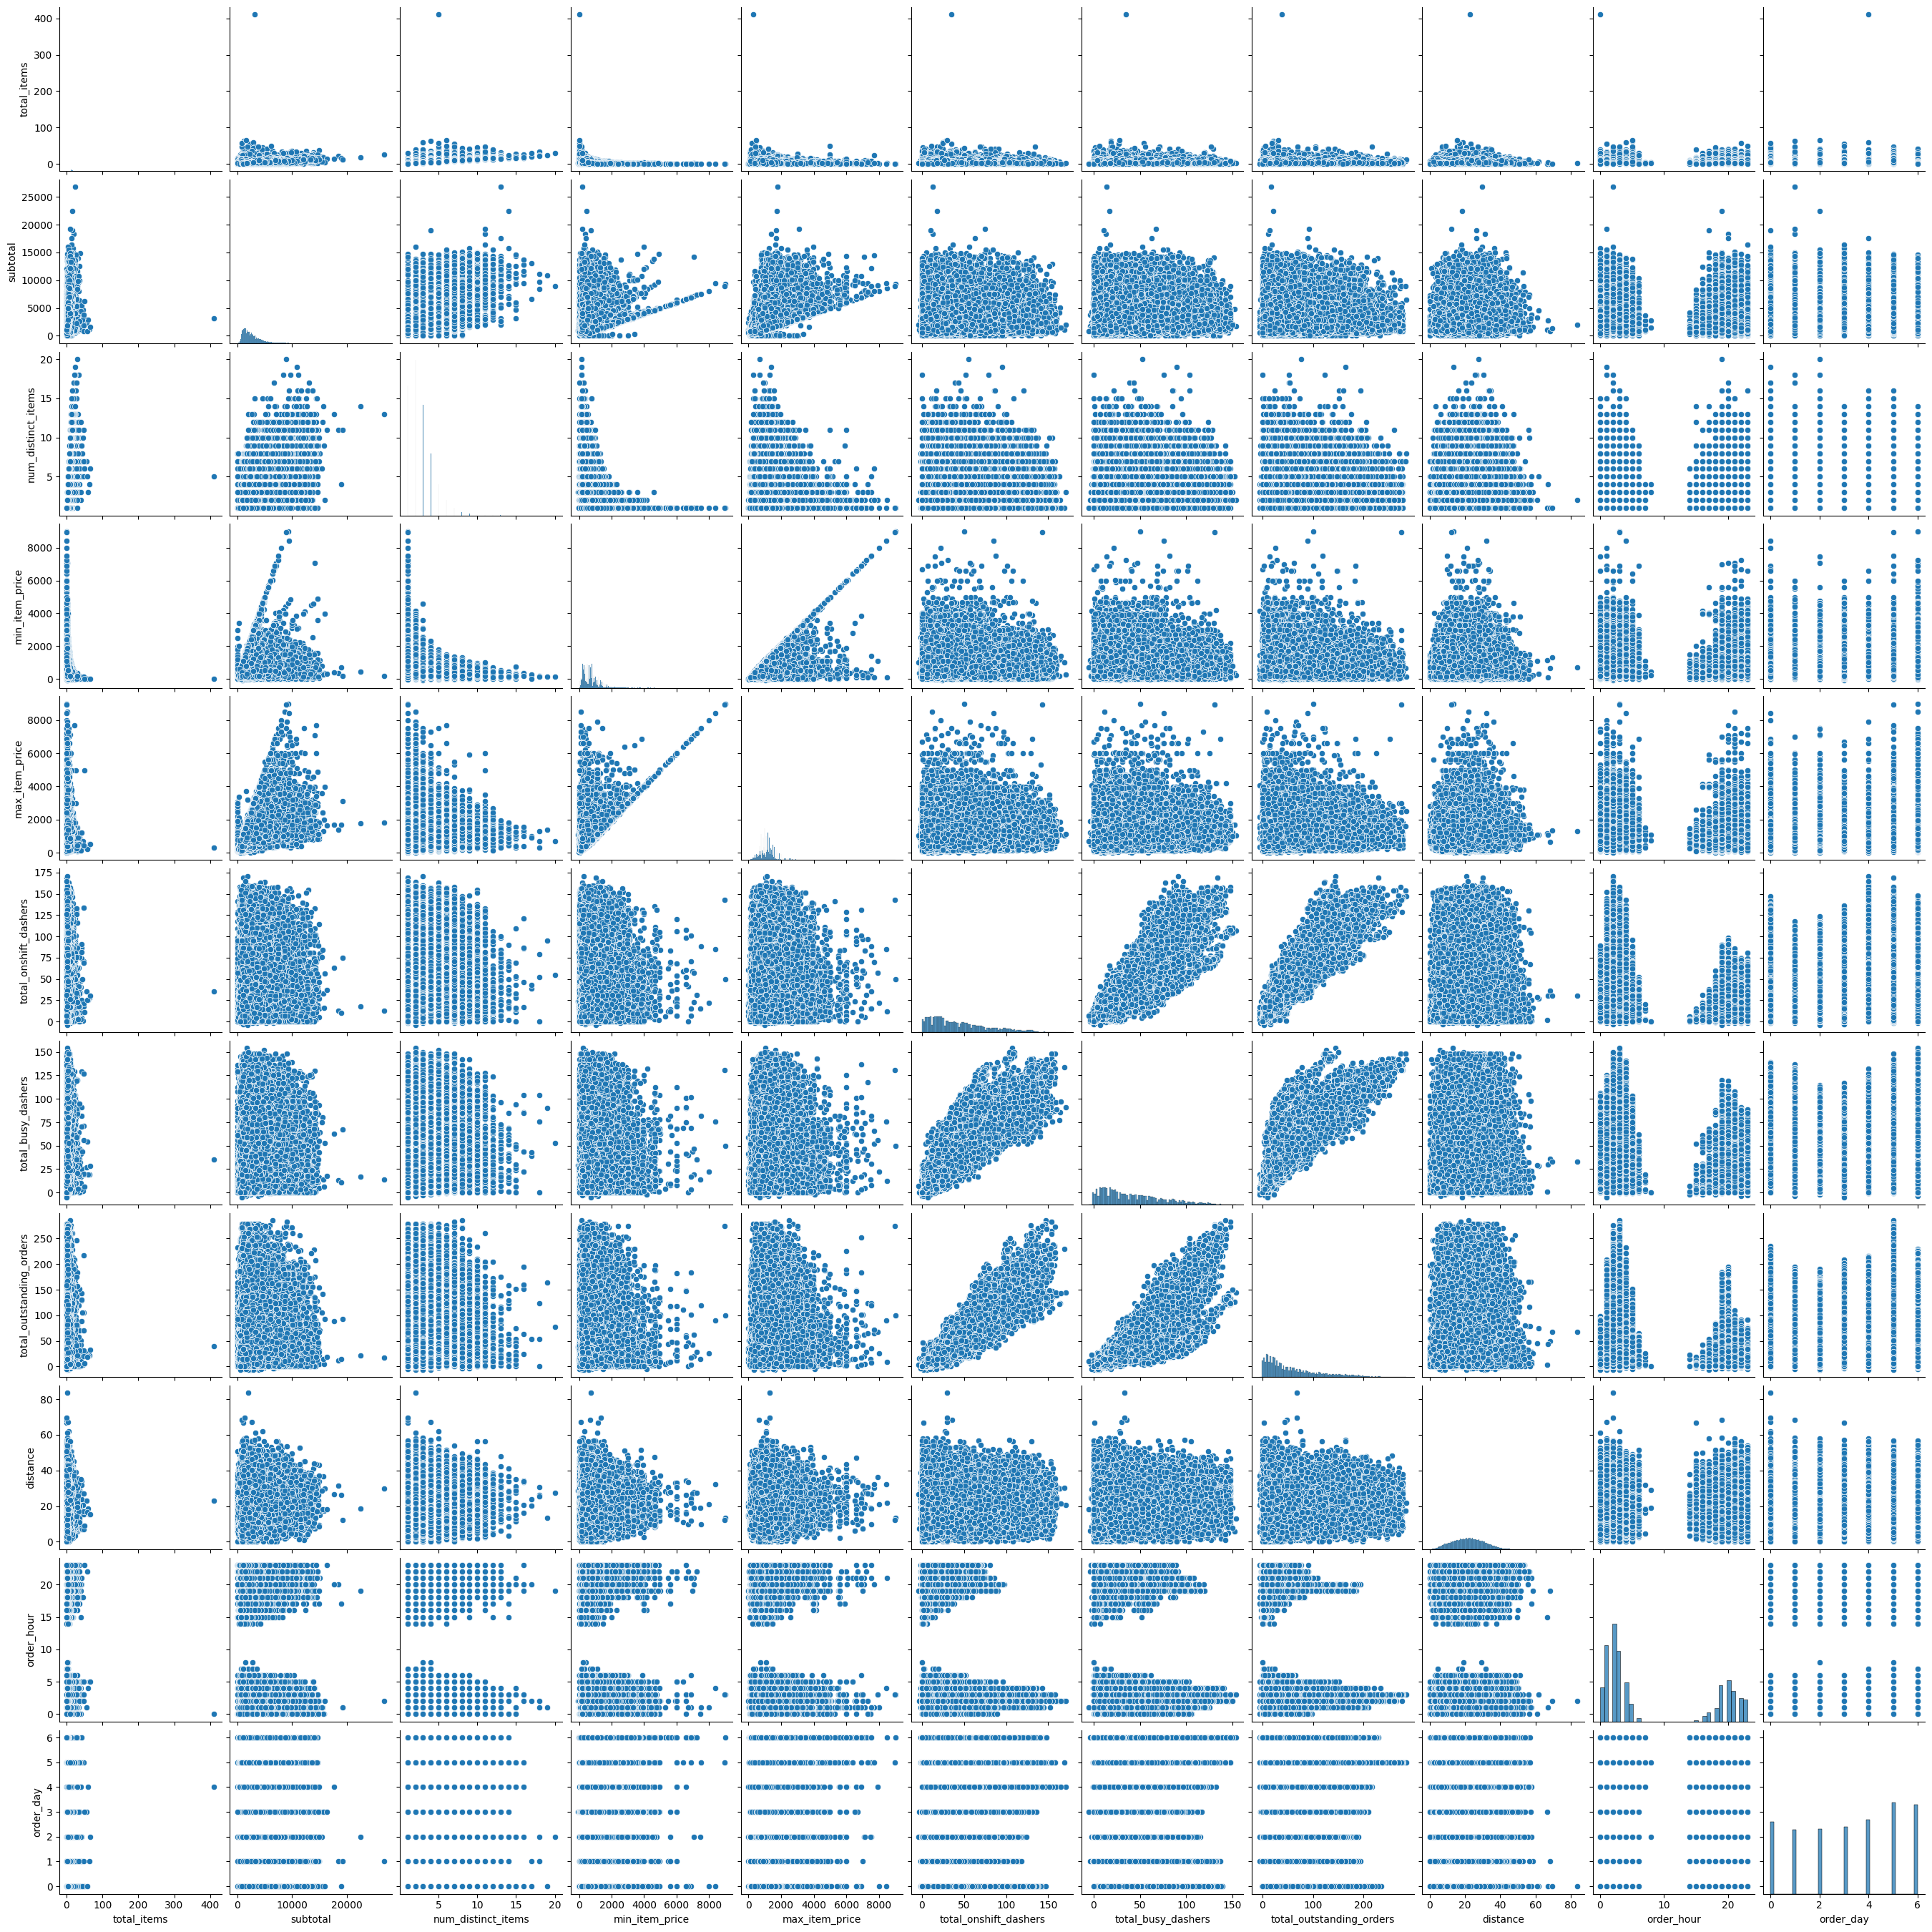

In [12]:
sns.pairplot(df_train[numerical])
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

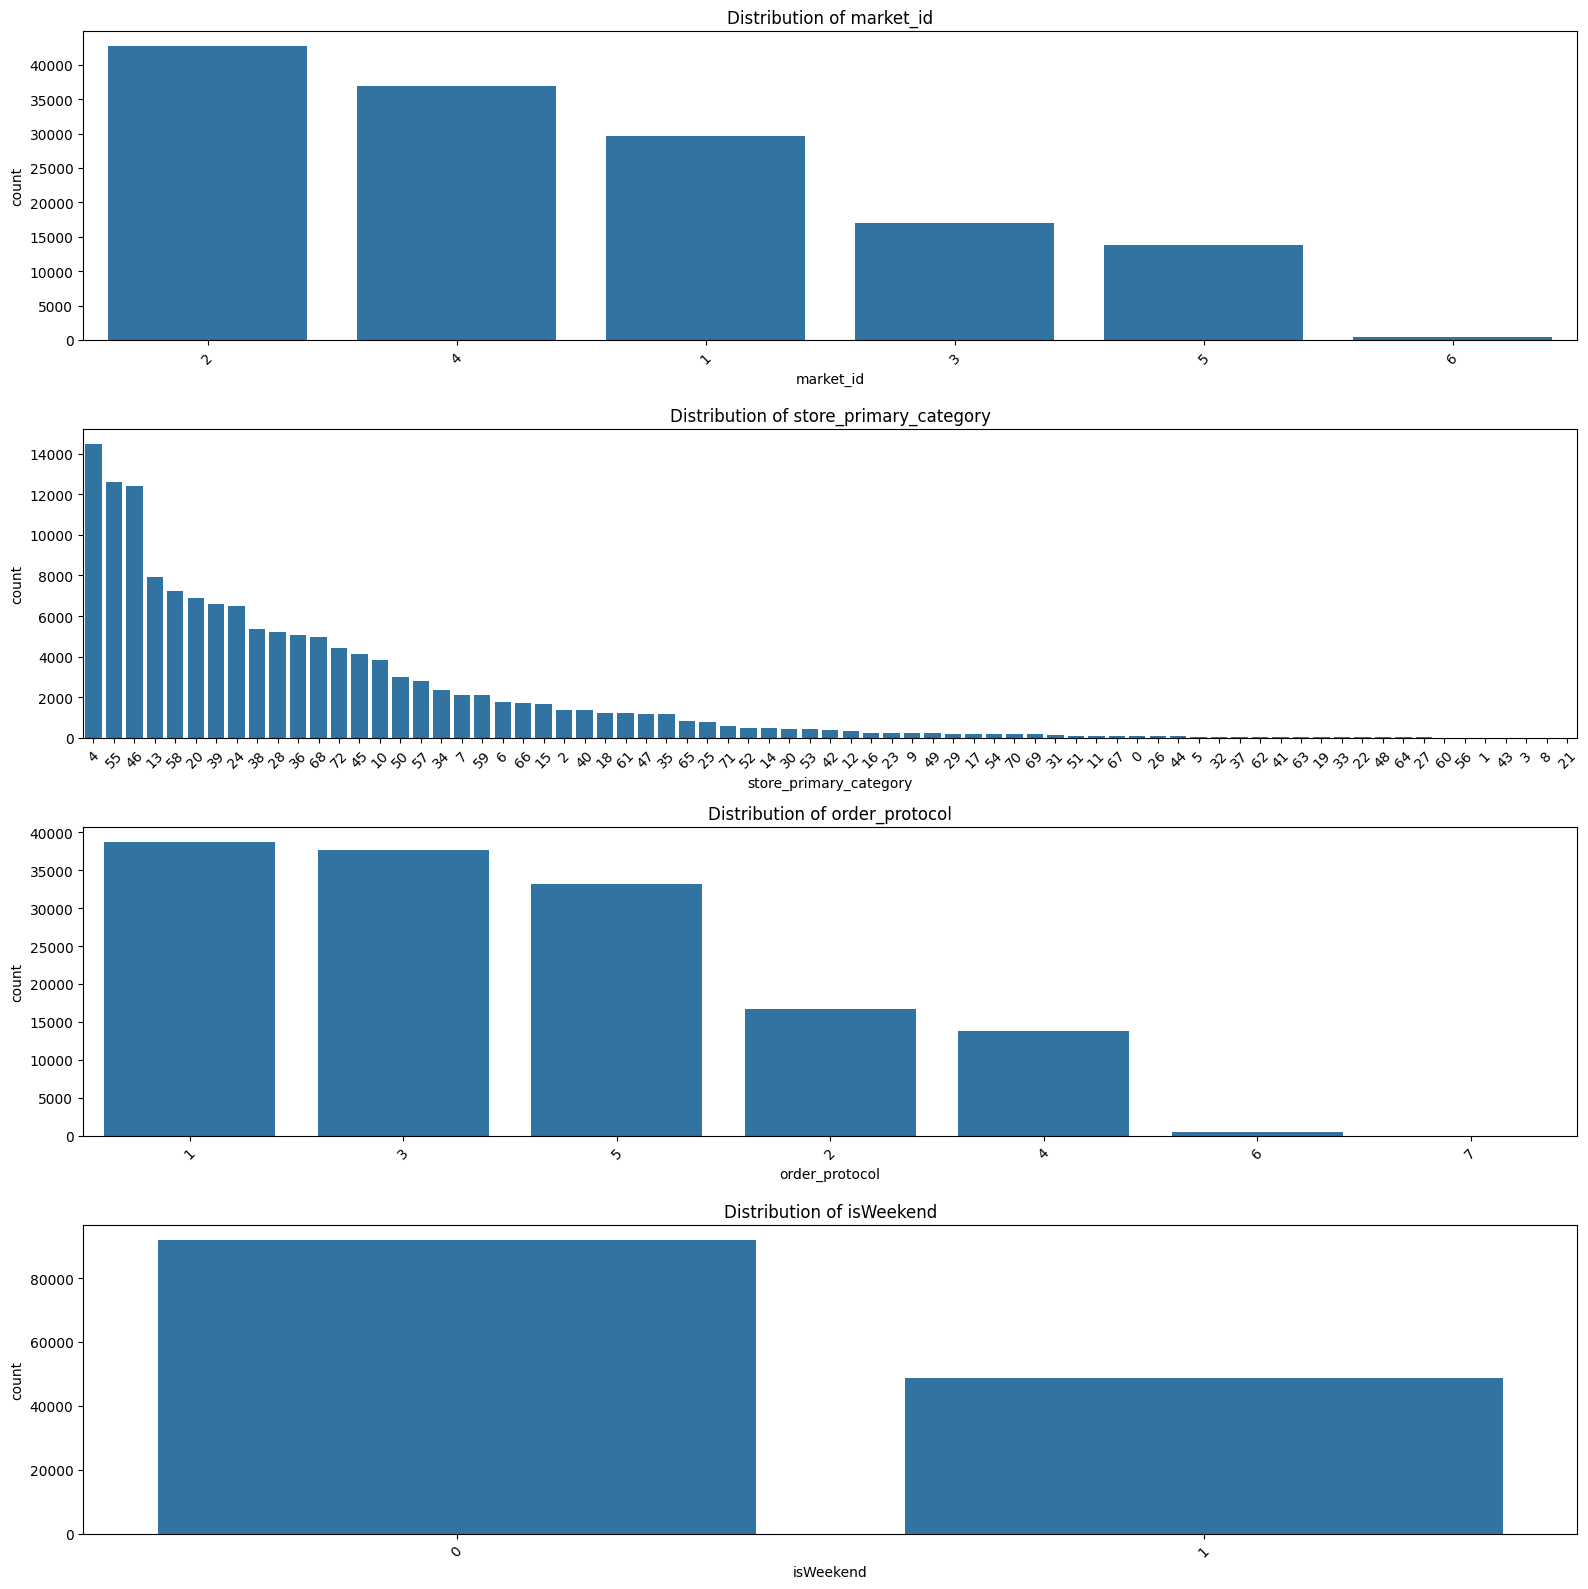

In [13]:
plt.figure(figsize=(16, 16))

for idx, col in enumerate(categorical, 1):
    plt.subplot(4, 1, idx)
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

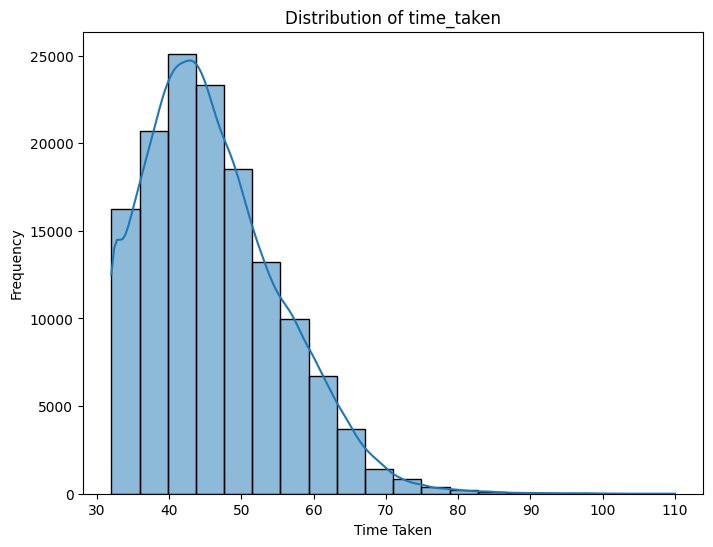

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train["time_taken"], kde=True, bins=20, edgecolor="black")
plt.title("Distribution of time_taken")
plt.xlabel("Time Taken")
plt.ylabel("Frequency")
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

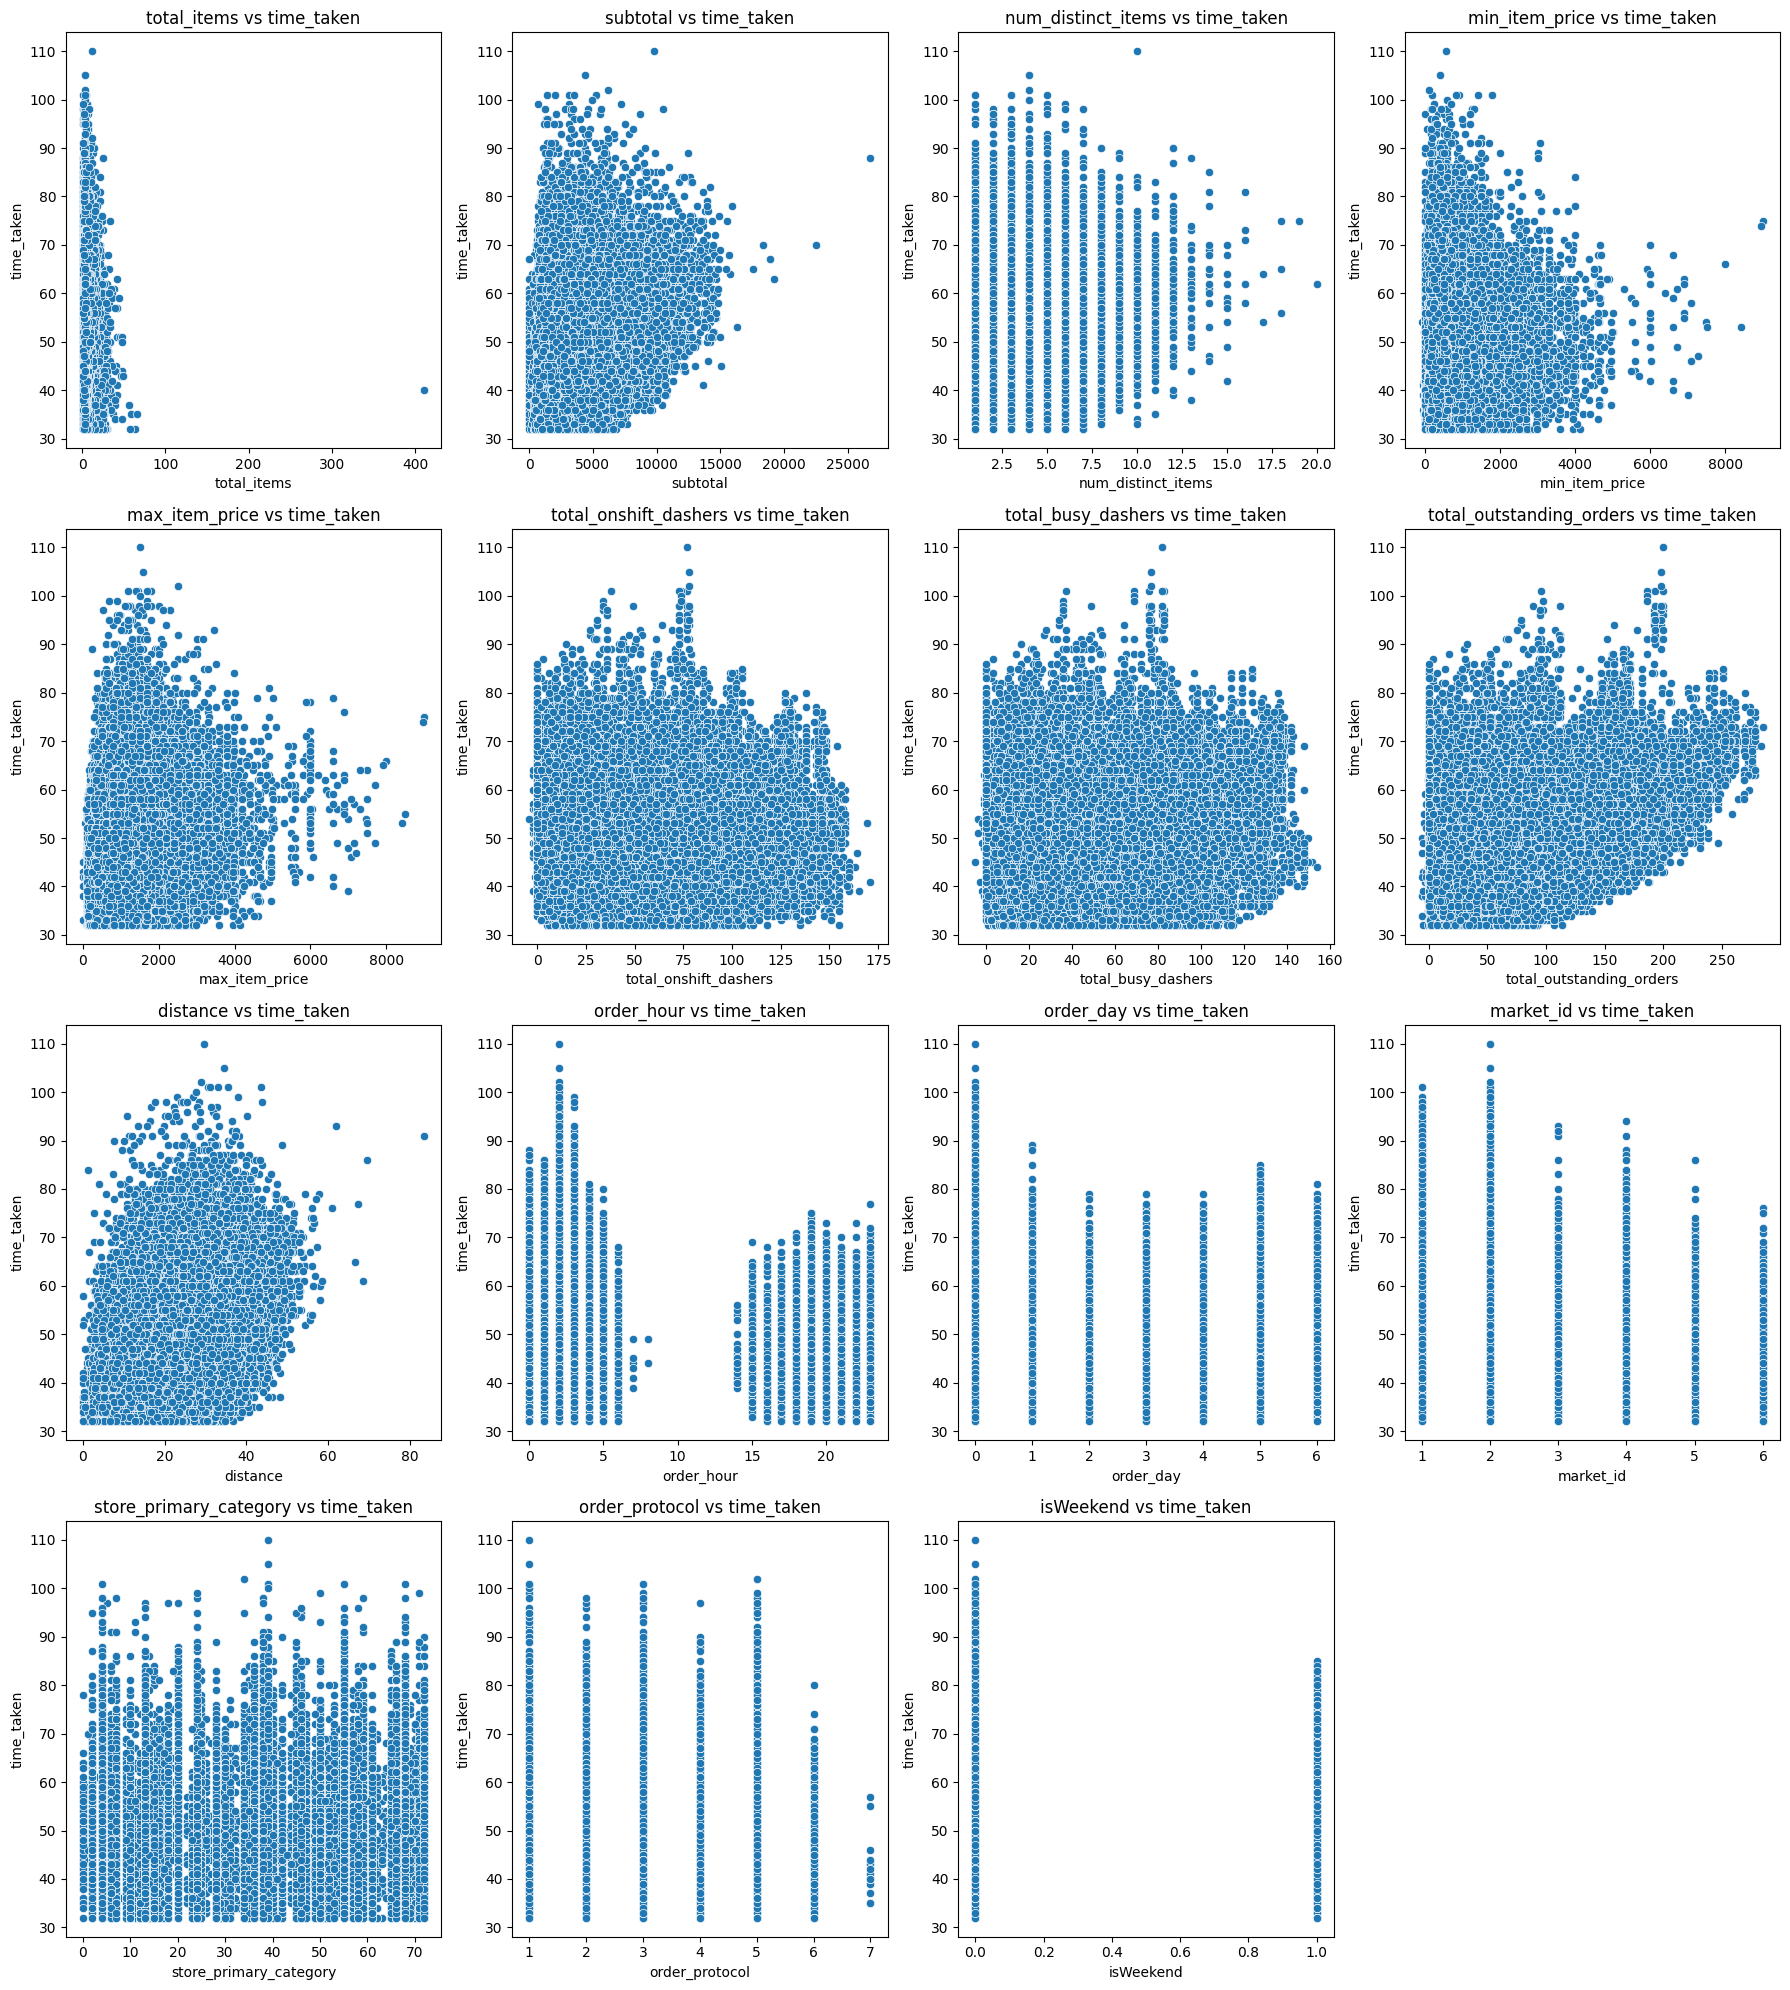

In [15]:
features = numerical + categorical

total_features = len(features)
total_cols = 4
total_rows = (total_features + total_cols - 1) // total_cols

fig, ax = plt.subplots(total_rows, total_cols, figsize=(18, total_rows * 5))
ax = ax.flatten()

for idx, feature in enumerate(features):
    sns.scatterplot(x=df_train[feature], y=df_train["time_taken"], ax=ax[idx])
    ax[idx].set_title(f"{feature} vs time_taken")
    ax[idx].set_xlabel(feature)
    ax[idx].set_ylabel("time_taken")

for i in range(idx + 1, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

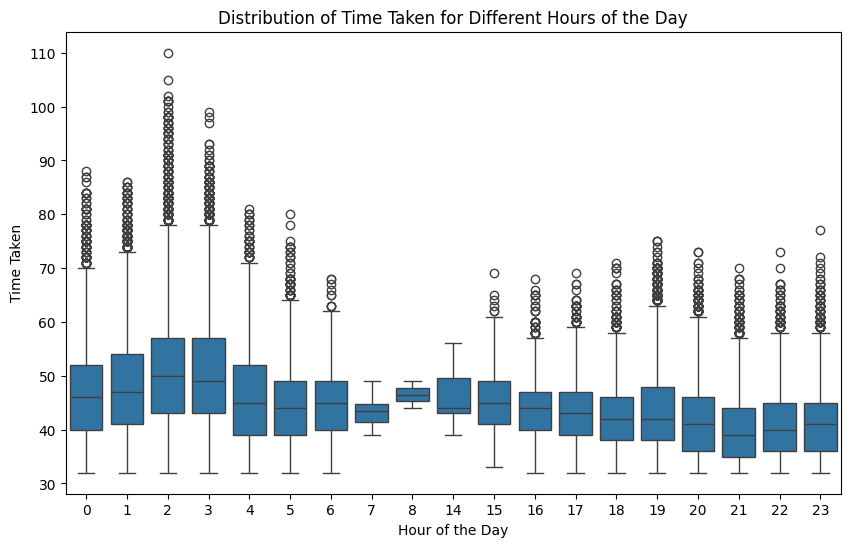

In [16]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df_train["order_hour"], y=df_train["time_taken"])
plt.title("Distribution of Time Taken for Different Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Time Taken")
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

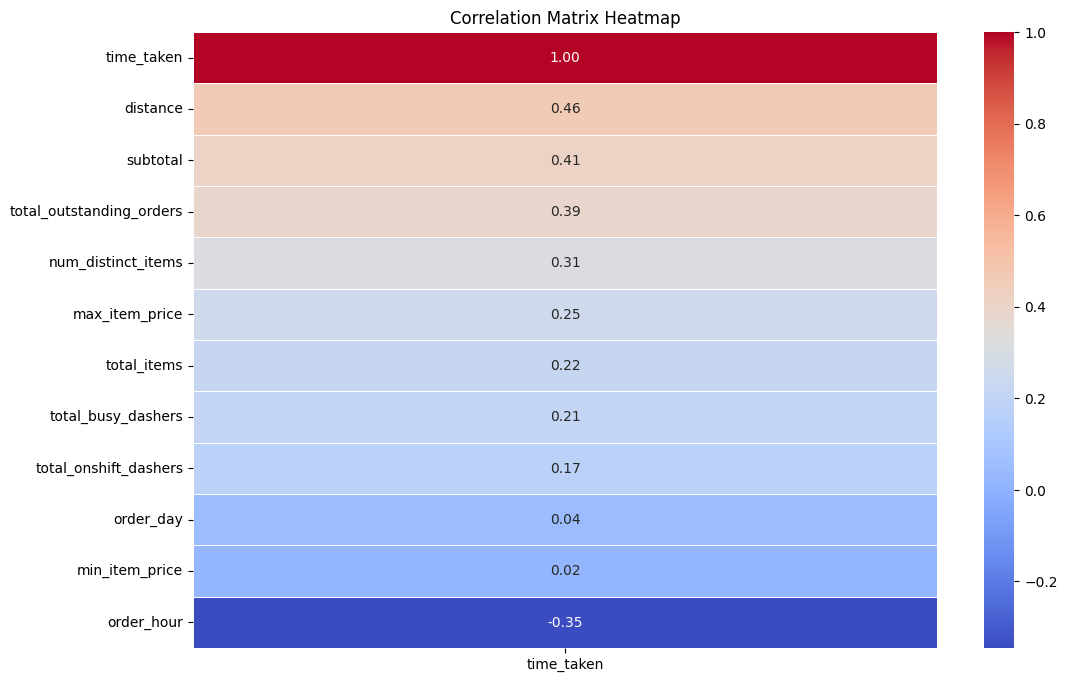

In [17]:
df_hm = df_train[numerical].copy()
df_hm = pd.concat([df_hm, df_train["time_taken"]], axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(df_hm.corr()[["time_taken"]].sort_values(by='time_taken', ascending=False), annot=True, 
            cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [18]:
df_train = df_train.drop(["min_item_price", "order_day", "total_onshift_dashers"], axis=1)

numerical.remove("min_item_price")
numerical.remove("order_day")
numerical.remove("order_hour")
numerical.remove("total_onshift_dashers")

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

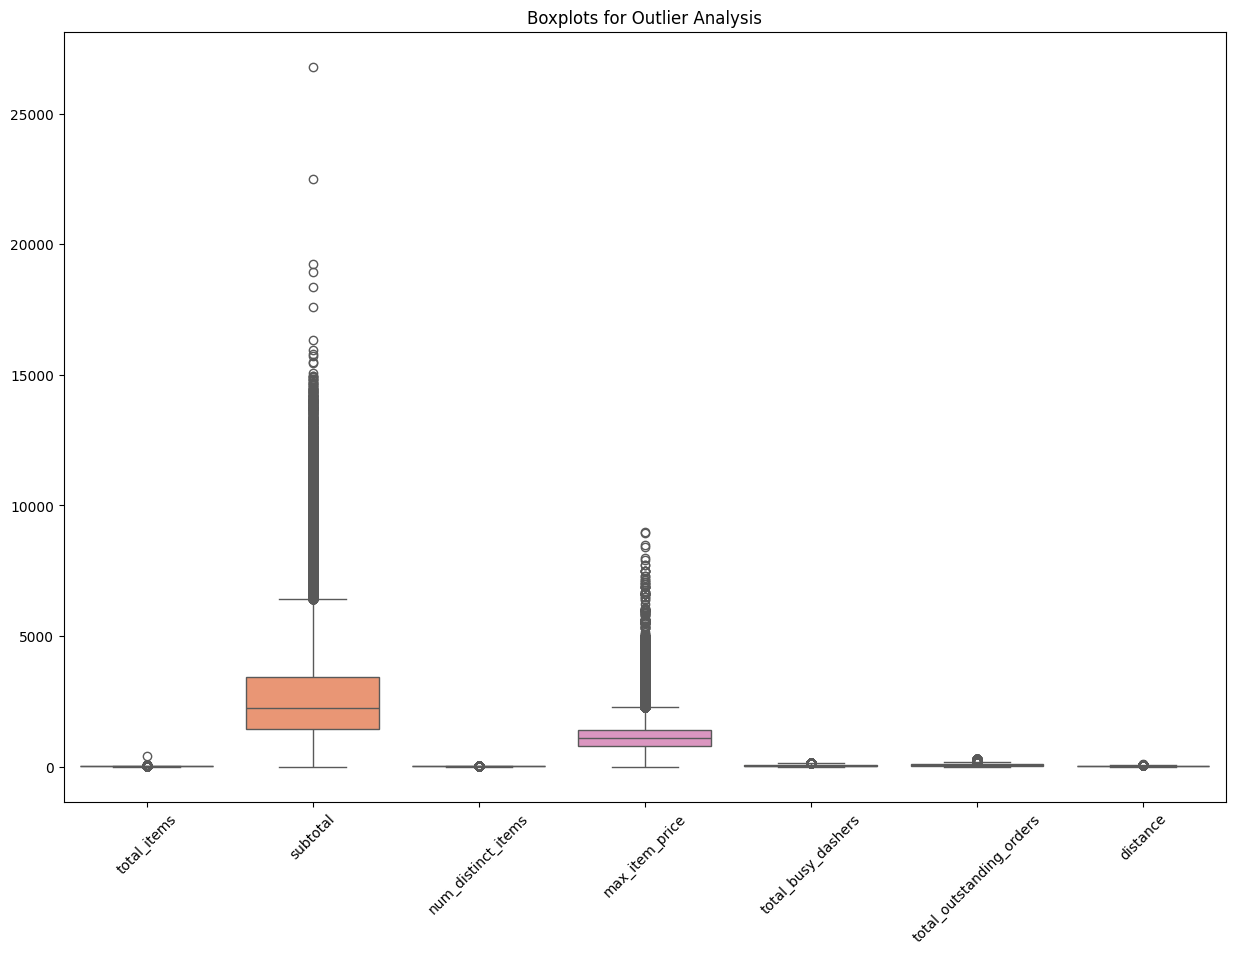

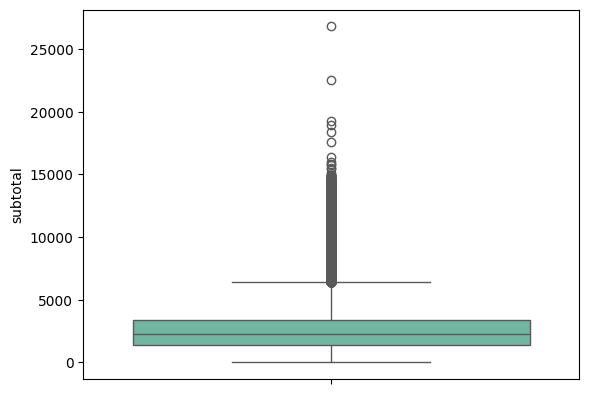

In [19]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=df_train[numerical], orient="v", palette="Set2")

plt.xticks(rotation=45)
plt.title("Boxplots for Outlier Analysis")
plt.show()

sns.boxplot(data=df_train["subtotal"], orient="v", palette="Set2")
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [20]:
df_train = df_train[df_train["total_busy_dashers"] >= 0]
df_train = df_train[df_train["total_outstanding_orders"] >= 0]

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Skiping optional

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Skiping optional

##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Skiping optional

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Skiping optional

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Skiping optional

#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Skiping optional

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [21]:
import sklearn
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [22]:
scaler = MinMaxScaler()
numeric = (["total_items", "subtotal", "num_distinct_items", "max_item_price", "total_busy_dashers", 
            "total_outstanding_orders", "distance"])
y_train = df_train.pop("time_taken")
X_train = df_train
X_train[numeric] = scaler.fit_transform(X_train[numeric])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [23]:
X_train_sm = sm.add_constant(X_train[["num_distinct_items", "total_outstanding_orders", "total_busy_dashers", 
                                      "distance", "subtotal"]])
lr = sm.OLS(y_train, X_train_sm)

In [24]:
lr_model = lr.fit()

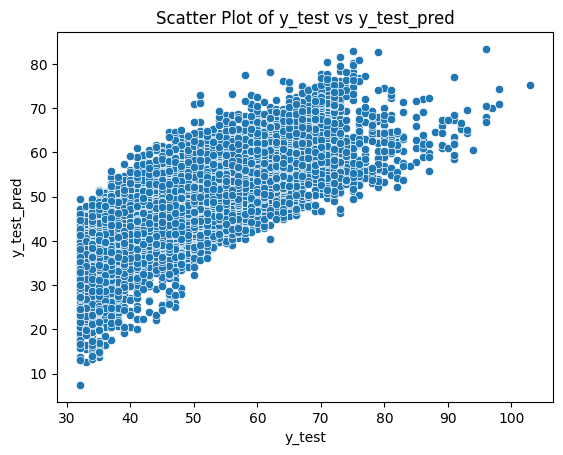

In [25]:
y_test = df_test.pop("time_taken")
X_test = df_test
X_test[numeric] = scaler.transform(X_test[numeric])
X_test_sm = sm.add_constant(X_test[["num_distinct_items", "total_outstanding_orders", "total_busy_dashers", 
                                      "distance", "subtotal"]])

y_test_pred = lr_model.predict(X_test_sm)
sns.scatterplot(x=y_test, y=y_test_pred)

plt.title("Scatter Plot of y_test vs y_test_pred")
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

In [26]:
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R2 Score: 0.6658738809268645
Mean Absolute Error: 4.134878312719282
Mean Squared Error: 29.245151741543296
Root Mean Squared Error: 5.407878672968107


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [27]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
rfe = rfe.fit(X_train[numeric], y_train)
selected_features = X_train[numeric].columns[rfe.support_]

print("Selected features by RFE:")
print(selected_features)

Selected features by RFE:
Index(['total_items', 'subtotal', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')


In [28]:
rfe_selected_features = ["total_items", "subtotal", "total_busy_dashers", "total_outstanding_orders", "distance"]
X_train_rfe_sm = sm.add_constant(X_train[rfe_selected_features])
X_test_rfe_sm = sm.add_constant(X_test[rfe_selected_features])

lr_final = sm.OLS(y_train, X_train_rfe_sm).fit()
y_test_pred = lr_final.predict(X_test_rfe_sm)

lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 5.501e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:42:28   Log-Likelihood:            -4.3706e+05
No. Observations:              140572   AIC:                         8.741e+05
Df Residuals:                  140566   BIC:                         8.742e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       30.7066      0.046    661.971      0.000      30.616      30.798
total_items                 14.4122      2.593      5.559      0.000       9.331      19.494
subtotal                    48.3348      0.255    189.806      0.000      47.836      48.834
total_busy_dashers         -54.0924      0.192   -281.966      0.000     -54.468     -53.716
total_outstanding_orders    73.0972      0.217    337.435      0.000      72.673      73.522
distance                    39.4546      0.138    285.424      0.000      39.184      39.726
==============================================================================
Omnibus:                    12156.098   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23845.446
Skew:                           0.588   Prob(JB):                         0.00
Kurtosis:                       4.639   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

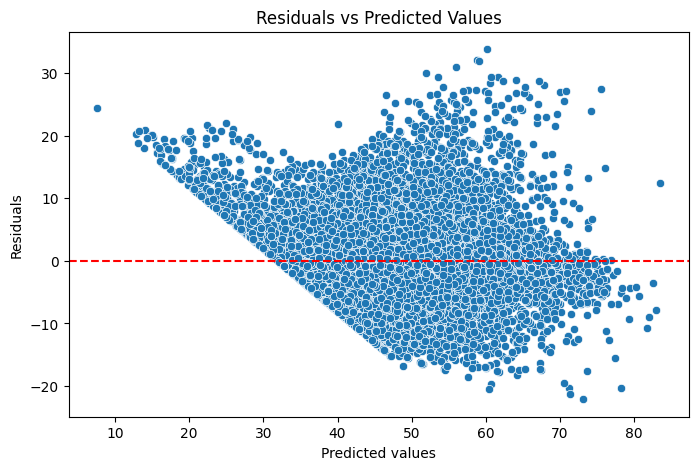

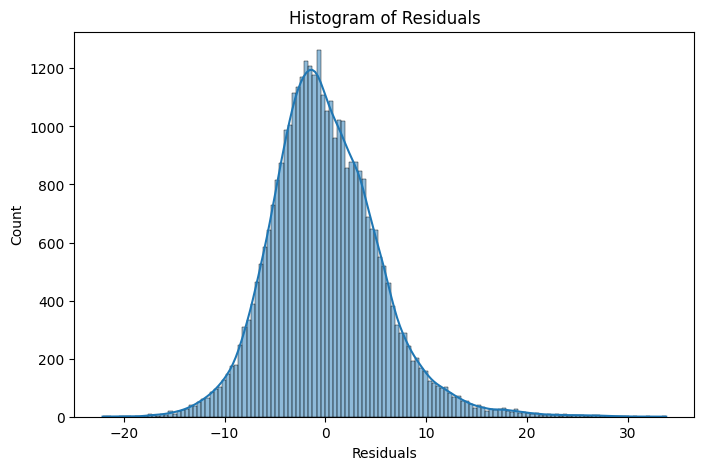

In [29]:
residuals = y_test - y_test_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [30]:
X_train_unscaled = df_train
X_train_unscaled_sm = sm.add_constant(X_train_unscaled[["num_distinct_items", "total_outstanding_orders", "total_busy_dashers", 
                                      "distance", "subtotal"]])
X_test_unscaled = df_test
X_test_unscaled_sm = sm.add_constant(X_test_unscaled[["num_distinct_items", "total_outstanding_orders", "total_busy_dashers", 
                                      "distance", "subtotal"]])
lr_model = sm.OLS(y_train, X_train_sm).fit()

y_test_pred = lr_model.predict(X_test_unscaled_sm)

r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R2 Score: 0.6658738809268645
Mean Absolute Error: 4.134878312719282
Mean Squared Error: 29.245151741543296
Root Mean Squared Error: 5.407878672968107


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [33]:
print("Since the coefficient for 'total_outstanding_orders' is 73.0972 for scaled vaalues & a coefficient of '73.0466' for unscaled values. So we can say that scaling is not having much impact in our case\n")
lr_model.summary()

Since the coefficient for 'total_outstanding_orders' is 73.0972 for scaled vaalues & a coefficient of '73.0466' for unscaled values. So we can say that scaling is not having much impact in our case



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             time_taken   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 5.547e+04
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:54:16   Log-Likelihood:            -4.3667e+05
No. Observations:              140572   AIC:                         8.733e+05
Df Residuals:                  140566   BIC:                         8.734e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       30.6805      0.046    663.352      0.000      30.590      30.771
num_distinct_items           6.5614      0.230     28.530      0.000       6.111       7.012
total_outstanding_orders    73.0466      0.216    338.128      0.000      72.623      73.470
total_busy_dashers         -53.9961      0.191   -282.233      0.000     -54.371     -53.621
distance                    39.4434      0.138    286.168      0.000      39.173      39.714
subtotal                    43.4883      0.290    149.920      0.000      42.920      44.057
==============================================================================
Omnibus:                    12389.391   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24567.290
Skew:                           0.594   Prob(JB):                         0.00
Kurtosis:                       4.668   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> order_protocol, market_id & store_primary_category. We can realise that this columns do not have any major influence on the dependent variable (time_taken).



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> The dataset is divided into training sets and testing sets. test_size=0.2, means that 20% of the total data is reserved for testing, while the remaining 80% is used for training a model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance has the highest correlation.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Using Box plot, I removed most of the outliers. Also the min-max scaling helped



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> 1. total_outstanding_orders - coefficient = +73.0972 - Directly proportional
> 2. subtotal                 - coefficient = +48.3348 - Directly proportional
> 3. total_busy_dashers       - coefficient = -54.0924 - Inversely proportional



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

In [ ]:
**Answer:**
> Linear regression algorithm is used when there is a linearity between the dependent & independent variable.
> Y=mx+C Y=m1x1+m2X2+...+mnxn+c (Multi variable)
> Linearity: The relationship between X and Y is linear. 
> Independence: Observations are independent of each other.
> Homoscedasticity: The variance of residuals is constant across all levels of X. 
> No Multicollinearity: Independent variables should not be highly correlated with each other. 
> Normally Distributed Residuals: The errors should follow a normal distribution.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Both simple linear regression (SLR) & multiple linear regression (MLR) works on same priciples, the only difference is that in SLR we deal only with single independent variable & in MLR we deal with multiple independent variables. So, we use single feature to predict values in SLR wheres in MLR we use multiple features for predicting the values of dependent variable. Since we have multiple features in MLR so we have few new concepts like multicollinearity, VIF which are absent in case of SLR.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Cost function, as the name suggests is a function which is used to minimize the cost. The cost function basically tries to achieve the best fit line by changing the values of coefficients. There are multiple ways to minimize cost like ordinary lear squares (OLS), gradient descent, etc




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> 1. Underfitting - This is the case when the model is way too simple & its predicted values have high error, both on training & test dataset.
> 2. Overfitting - The model memorizes the training data insted of learning patterns.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

>Residual plots are crucial for evaluating the validity of a linear regression model. They help assess whether the assumptions of linear regression are met, ensuring the model’s reliability
>Checking Homoscedasticity (Constant Variance)
>Checking for Normality of Residuals
>Checking for Independence of Residuals